# <center> EDA (Exploratory Data Analysis) </center>
<center>En este Jupyter Notebook realizaremos un Análisis Exploratorio de Datos (EDA) a los 4 datasets que limpiamos (items, reviews_sentiment_analysis, steam_games y users) y eligiremos las variables que nos seran útiles para el Modelo de Recomendación que nos solicitaron.</center>

## Importación de librerias

In [2]:
import pandas as pd
import numpy as np
import Utilities as u
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats
from wordcloud import WordCloud

plt.style.use('fivethirtyeight')


import warnings
warnings.filterwarnings("ignore")

## Lectura de los datasets

Leemos los archivos CSV y los convertimos en DataFrames

In [3]:
steam_games = pd.read_csv('./dataset/Modificados/steam_games.csv')

items = pd.read_csv('./dataset/Modificados/items.csv' )

reviews = pd.read_csv('./dataset/Modificados/reviews_sentiment_analysis.csv')

users = pd.read_csv('./dataset/Modificados/users.csv')

model = pd.read_csv('./dataset/Endpoints/model_recommend.csv')

## Dataset 'Steam Games'

Este Dataframe contiene informacion general de los items de Steam, como por ejemplo:
* **publisher**: Empresa publicadora del contenido
* **genres**: Genero del contenido
* **app_name**: Nombre del contenido
* **title**: Titulo del contenido
* **url**: URL de publicación del contenido
* **release_date**: Fecha de lanzamiento
* **tags**: Etiquetas del contenido
* **specs**: Especificaciones
* **price**: Precio del contenido
* **early_access**: Acceso temprano
* **id**: Identificador único de contenido
* **developer**: Desarrollador
* **release_year**: Año del lanzamiento

### Información general

In [3]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32132 entries, 0 to 32131
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24062 non-null  object 
 1   genres        28850 non-null  object 
 2   app_name      32131 non-null  object 
 3   title         30083 non-null  object 
 4   url           32132 non-null  object 
 5   release_date  30066 non-null  object 
 6   tags          31970 non-null  object 
 7   specs         31463 non-null  object 
 8   price         32132 non-null  object 
 9   early_access  32132 non-null  bool   
 10  id            32132 non-null  float64
 11  developer     28834 non-null  object 
 12  release_year  30026 non-null  float64
dtypes: bool(1), float64(2), object(10)
memory usage: 3.0+ MB


### Registros nulos
Porcentaje de registros nulos en cada columna del dataset.

In [4]:
u.porcentaje_nulos(steam_games)

La columna publisher tiene un 25.1% de valores nulos.
La columna genres tiene un 10.2% de valores nulos.
La columna app_name tiene un 0.0% de valores nulos.
La columna title tiene un 6.4% de valores nulos.
La columna url tiene un 0.0% de valores nulos.
La columna release_date tiene un 6.4% de valores nulos.
La columna tags tiene un 0.5% de valores nulos.
La columna specs tiene un 2.1% de valores nulos.
La columna price tiene un 0.0% de valores nulos.
La columna early_access tiene un 0.0% de valores nulos.
La columna id tiene un 0.0% de valores nulos.
La columna developer tiene un 10.3% de valores nulos.
La columna release_year tiene un 6.6% de valores nulos.


### Estadística descriptiva
La estadística descriptiva ayuda a describir las características básicas del conjunto de datos y obtener un resumen de los datos, también conocido como resumen de 5 puntos.

* Mediana : El valor medio en las columnas, también llamado percentil 50. o 2do cuartil.
* 1er cuartil : El percentil 25.
* 3er cuartil : El percentil 75.
* Mínimo : La observación más pequeña en columnas.
* Máximo : La observación más grande en columnas.

In [5]:
steam_games.describe()

,id,release_year
count,3.213200e+04,30026.000000
mean,4.517524e+05,2014.778392
std,1.827147e+05,3.505777
min,1.000000e+01,1970.000000
25%,3.292775e+05,2014.000000
50%,4.520300e+05,2016.000000
75%,5.933925e+05,2017.000000
max,2.028850e+06,2024.000000


Veamos las estadísticas descriptivas de las columnas que no tienen registros numericos, en este caso muestra 4 puntos:
* count: Cantidad de registros.
* unique: Cantidad de registros únicos.
* top: El registro con mayor frecuencia en los registros.
* freq: Frecuencia del registros top.

In [6]:
columns_text = steam_games.select_dtypes(include=['object']).columns

df_ = steam_games[columns_text]
df_.describe()

,publisher,genres,app_name,title,url,release_date,tags,specs,price,developer
count,24062,28850,32131,30083,32132,30066,31970,31463,32132,28834
unique,8236,883,32094,30054,32132,3582,15395,4649,148,10992
top,Ubisoft,['Action'],Soundtrack,Soundtrack,http://store.steampowered.com/app/761140/Lost_...,2012-10-16,"['Casual', 'Simulation']",['Single-player'],4.99,Ubisoft - San Francisco
freq,385,1879,3,3,1,100,1292,2794,4278,1259


### Cantidad de ítems unicos registrado

Veamos la cantidad de items únicos que hay registrado, basandonos en la columna ID

In [7]:
u.registros_unicos(steam_games,'id')

'La columna id tiene 32132 registros unicos'

### Distribuciones

#### Distribución de los ítems segun el año de lanzamiento

Primero extraemos la cantidad de registros por año, y luego lo ordenamos

In [38]:
cant_años = steam_games.release_year.value_counts()

cant_años = cant_años.sort_index()

In [30]:
cant_años

release_year
1970.0       2
1975.0       1
1980.0       1
1981.0       3
1982.0       3
1983.0       4
1984.0       4
1985.0       3
1986.0       1
1987.0       9
1988.0       7
1989.0      10
1990.0      12
1991.0      16
1992.0      15
1993.0      34
1994.0      36
1995.0      33
1996.0      39
1997.0      42
1998.0      61
1999.0      55
2000.0      40
2001.0      69
2002.0      50
2003.0      84
2004.0      79
2005.0     102
2006.0     155
2007.0     167
2008.0     213
2009.0     341
2010.0     442
2011.0     590
2012.0    1192
2013.0    1552
2014.0    2844
2015.0    4952
2016.0    6943
2017.0    9594
2018.0     196
2019.0      17
2020.0       5
2021.0       4
2022.0       3
2024.0       1
Name: count, dtype: int64

Creamos el gráfico, en este caso, un gráfico de barras.

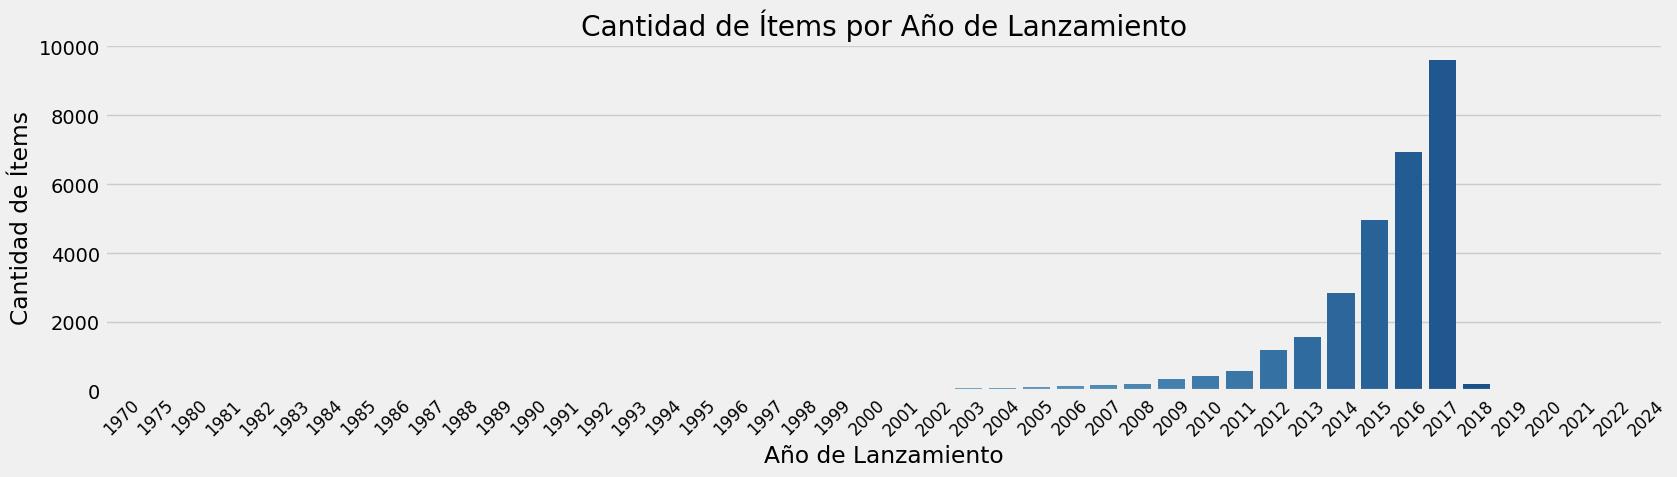

In [44]:
plt.figure(figsize=(17, 5))

sns.barplot(x= cant_años.index.astype(int), y= cant_años.values, palette='Blues')
plt.title('Cantidad de Ítems por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento') 
plt.ylabel('Cantidad de Ítems')

plt.xticks(rotation= 45, fontsize=12)
plt.tight_layout()

plt.show()

Vemos un incremento exponencial de items lanzados apartir del año 2010. Esto puede deberse al acceso a Herramientas de Desarroll. A lo largo de la década de 2000 y especialmente a partir de 2010, ha habido un aumento significativo en la accesibilidad de herramientas de desarrollo de videojuegos. Plataformas como Unity y Unreal Engine se volvieron más accesibles y fáciles de usar, lo que permitió a un número creciente de desarrolladores independientes y pequeños estudios crear juegos de alta calidad con recursos limitados.

#### Distribución de los precios

Primero extraemos los precios unicos para cada item

In [10]:
precio_unicos = steam_games.groupby('id')['price'].unique().reset_index().explode('price')
df_price = precio_unicos['price']

In [11]:
precio_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32132 entries, 0 to 32131
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      32132 non-null  float64
 1   price   32132 non-null  object 
dtypes: float64(1), object(1)
memory usage: 753.1+ KB


In [12]:
precio_unicos = precio_unicos[precio_unicos['price'] != '--']

In [13]:
precio_unicos['price'] = precio_unicos['price'].astype(float)

Creamos el gráfico, en este caso, un gráfico de barras.

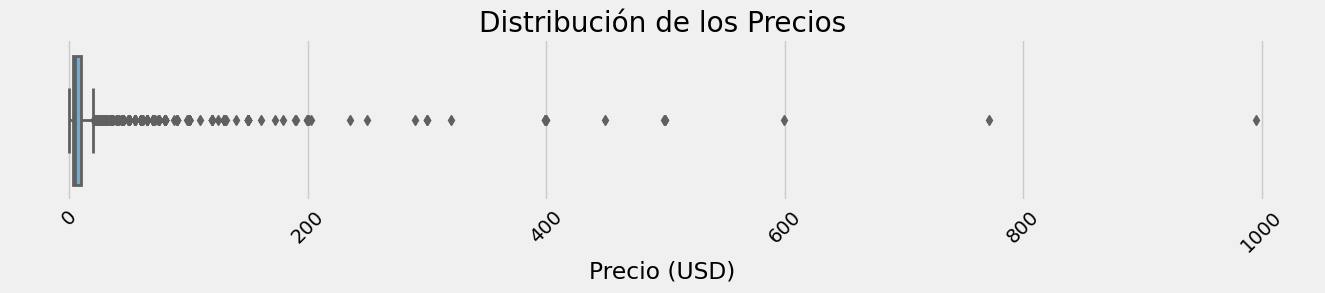

In [14]:
plt.figure(figsize = (15,2))
sns.boxplot(x = 'price', data = precio_unicos, linewidth= 2 ,palette='Blues') 
plt.title('Distribución de los Precios')
plt.xlabel('Precio (USD)')
plt.xticks(rotation= 45)

plt.show()

Obervamos claramente la presencia de outliers, veamos las estadisticas descripticas del dataset

In [15]:
precio_unicos.describe()

,id,price
count,3.075500e+04,30755.000000
mean,4.521594e+05,8.895293
std,1.834394e+05,16.338786
min,1.000000e+01,0.000000
25%,3.288050e+05,2.990000
50%,4.546400e+05,4.990000
75%,5.941920e+05,9.990000
max,2.028850e+06,995.000000


Vamos a filtrar los registros para ver mas detallada la informacion

In [16]:
precio_unicos_filtrado = precio_unicos[precio_unicos['price'] <= 100] 

In [17]:
precio_unicos_filtrado.describe()

,id,price
count,3.069400e+04,30694.000000
mean,4.520318e+05,8.433937
std,1.834561e+05,10.183007
min,1.000000e+01,0.000000
25%,3.287325e+05,2.990000
50%,4.545650e+05,4.990000
75%,5.939450e+05,9.990000
max,2.028850e+06,99.990000


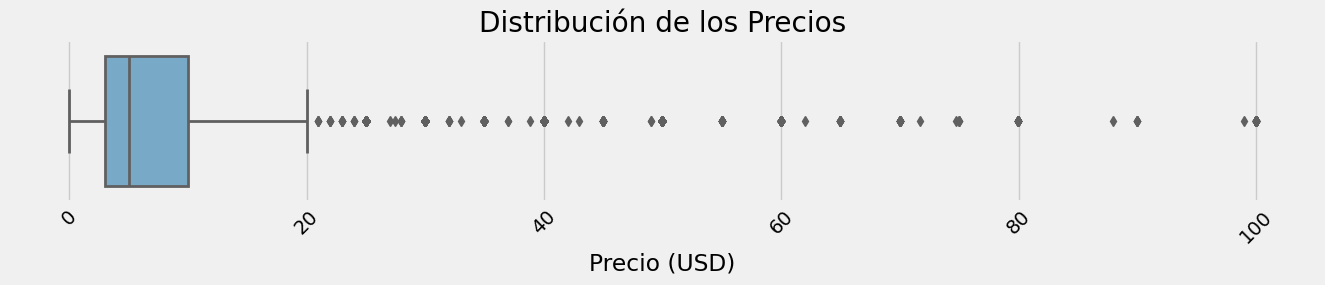

In [18]:
plt.figure(figsize = (15,2))
sns.boxplot(x = 'price', data = precio_unicos_filtrado, linewidth= 2 ,palette='Blues') 
plt.title('Distribución de los Precios')
plt.xlabel('Precio (USD)')
plt.xticks(rotation= 45)

plt.show()

Notamos que los outliers aparecen cuando el precio es superior a 20 USD, veamos cuantos registros son outliers

In [19]:
cantidad_outlier = precio_unicos[precio_unicos['price'] > 22].shape[0] 
print(f'Cantidad de outliers: {cantidad_outlier}')

Cantidad de outliers: 1875


Veamos el porcentaje de esos registros con valores atípicos

In [20]:
cantidad_registros = precio_unicos.shape[0]
percent_outlier = round((cantidad_outlier / cantidad_registros) * 100,2)

print(f'Hay un {percent_outlier}% de registros con valores atípicos en los precios')

Hay un 6.1% de registros con valores atípicos en los precios


Bien, estos outliers no afectan tanto nuestro dataset, ya que solo representa el 6,1%, podemos determinar que algunos items pueden valer mas de 20 USD, con un límite de hasta 200 USD, pero si sobrepasa ese límite, claramente es un error en los registros.

#### TOP 5 Desarrolladores

Graficaremos el TOP 5 de los desarrolladores con mas juegos lanzados

Primero separamos las columnas que necesitaremos para este gráfico

In [21]:
df = steam_games[['developer','id']]

Agruparemos por desarrollador y contamos la cantidad de items

In [22]:
top_developers = df.groupby('developer')['id'].count().reset_index()

In [23]:
top_developers

,developer,id
0,+7 Software,1
1,"+Mpact Games, LLC.",1
2,.M.Y.W.,1
3,.ez Games,1
4,07th Expansion,8
...,...,...
10987,致意,2
10988,萌石游戏,1
10989,高考恋爱委员会,1
10990,"高考恋爱委员会,Days",1


Ordenamos de manera descendiente y seleccionaremos los primeros 5

In [24]:
top_developers = top_developers.sort_values(by='id', ascending=False).head(5)

In [25]:
top_developers

,developer,id
9698,Ubisoft - San Francisco,1259
8445,"SmiteWorks USA, LLC",813
2724,Dovetail Games,253
4986,"KOEI TECMO GAMES CO., LTD.",232
6868,Paradox Development Studio,156


Graficamos

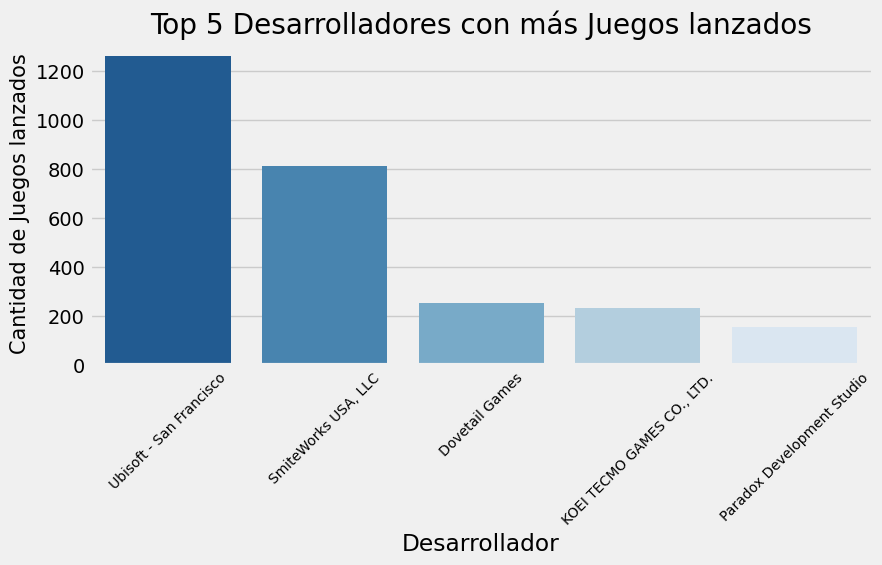

In [41]:
# Definimos la paleta de colores invertida
palette = sns.color_palette("Blues", len(top_developers))
palette = palette[::-1]  

plt.figure(figsize=(9,4))
sns.barplot(x= 'developer', y= 'id', data= top_developers , palette= palette)

plt.title('Top 5 Desarrolladores con más Juegos lanzados')
plt.xlabel('Desarrollador')
plt.ylabel('Cantidad de Juegos lanzados', fontsize= 15)

plt.xticks(rotation= 45, fontsize=10)

plt.show()


## Dataset 'Reviews'

Este Dataframe contiene informacion general de las reseña de los items de Steam, como por ejemplo:
* **user_id**: Identificador unico de usuario.
* **item_id**: Identificador unico del item.
* **posted**: Fecha del posteo de la reseña.
* **last_edited**: Fecha modificacion de la reseña.
* **funny**: Cantidad de personas que le divirtieron la reseña.
* **recommend**: Si el item es recomendado o no.
* **helpful**: Cantidad de personas que le resultaron útil la reseña. 
* **sentiment_analysis**: Categoria del analisis de sentimiento de la reseña. 

### Información general

In [45]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58431 entries, 0 to 58430
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             58431 non-null  object
 1   item_id             58431 non-null  int64 
 2   posted              48498 non-null  object
 3   last_edited         6037 non-null   object
 4   funny               8010 non-null   object
 5   recommend           58431 non-null  bool  
 6   helpful             58431 non-null  object
 7   sentiment_analysis  58431 non-null  int64 
dtypes: bool(1), int64(2), object(5)
memory usage: 3.2+ MB


### Registros nulos
Porcentaje de registros nulos en cada columna del dataset

In [46]:
u.porcentaje_nulos(reviews)

La columna user_id tiene un 0.0% de valores nulos.
La columna item_id tiene un 0.0% de valores nulos.
La columna posted tiene un 17.0% de valores nulos.
La columna last_edited tiene un 89.7% de valores nulos.
La columna funny tiene un 86.3% de valores nulos.
La columna recommend tiene un 0.0% de valores nulos.
La columna helpful tiene un 0.0% de valores nulos.
La columna sentiment_analysis tiene un 0.0% de valores nulos.


Vemos que en la columna *'last_edited'* y *'funny'* hay mas del 80% de registros vacios, asi que no contemplaremos estos registros para el EDA

In [101]:
reviews = reviews.drop(columns= ['last_edited','funny'])

### Estadística descriptiva
La estadística descriptiva ayuda a describir las características básicas del conjunto de datos y obtener un resumen de los datos, también conocido como resumen de 5 puntos.

* Mediana : El valor medio en las columnas, también llamado percentil 50. o 2do cuartil.
* 1er cuartil : El percentil 25.
* 3er cuartil : El percentil 75.
* Mínimo : La observación más pequeña en columnas.
* Máximo : La observación más grande en columnas.

In [50]:
reviews.describe()

,item_id,sentiment_analysis
count,58431.000000,58431.000000
mean,169703.670586,1.469152
std,132019.789420,0.756987
min,10.000000,0.000000
25%,8930.000000,1.000000
50%,218230.000000,2.000000
75%,261640.000000,2.000000
max,527340.000000,2.000000


Veamos las estadísticas descriptivas de las columnas que no tienen registros numericos, en este caso muestra 4 puntos:
* count: Cantidad de registros.
* unique: Cantidad de registros únicos.
* top: El registro con mayor frecuencia en los registros.
* freq: Frecuencia del registros top.

In [52]:
reviews.describe(include= 'all')

,user_id,item_id,posted,recommend,helpful,sentiment_analysis
count,58431,58431.000000,48498,58431,58431,58431.000000
unique,25458,NaN,1644,2,1344,NaN
top,76561198108415635,NaN,2014-06-21,True,No ratings yet,NaN
freq,10,NaN,220,51692,29732,NaN
mean,NaN,169703.670586,NaN,NaN,NaN,1.469152
std,NaN,132019.789420,NaN,NaN,NaN,0.756987
min,NaN,10.000000,NaN,NaN,NaN,0.000000
25%,NaN,8930.000000,NaN,NaN,NaN,1.000000
50%,NaN,218230.000000,NaN,NaN,NaN,2.000000
75%,NaN,261640.000000,NaN,NaN,NaN,2.000000


### Cantidad de ítems unicos registrado

Veamos la cantidad de items únicos que tuvieron reseñas, basandonos en la columna items_id

In [56]:
u.registros_unicos(reviews,'item_id')

'La columna item_id tiene 3682 registros unicos'

### DIstribuciones

#### Distribución de las reseñas:

Veamos la distribución de las reseñas para ver cuantas fueron recomendadas y cuantas no.

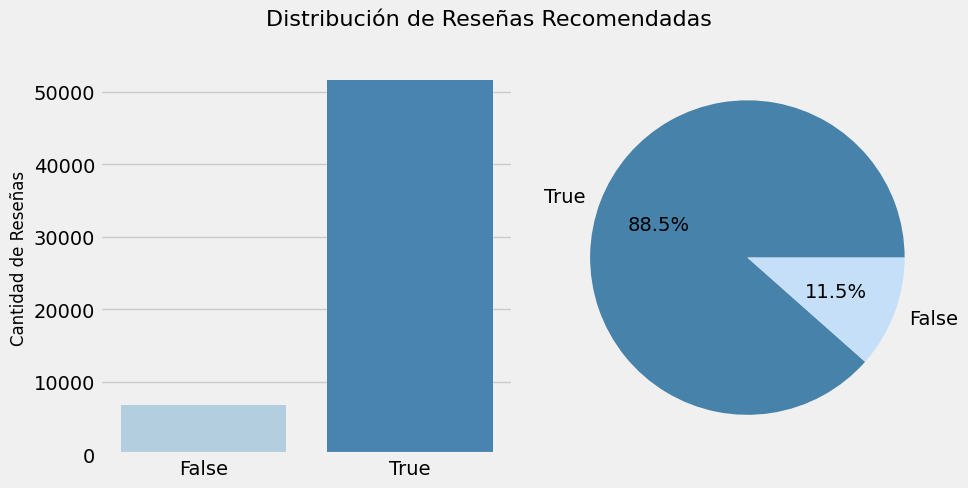

In [143]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  
sns.countplot(x= 'recommend', data= reviews, palette= 'Blues')
plt.xlabel('')
plt.ylabel('Cantidad de Reseñas',fontsize= 12)


plt.subplot(1, 2, 2)  
reviews['recommend'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#4682A9', '#C5DFF8'])
plt.ylabel('')

plt.suptitle('Distribución de Reseñas Recomendadas', fontsize=16)

plt.tight_layout() 
plt.show()

#### Distribución de las categorías del Análisis de sentimiento

Primero vamos a modificar los valores numéricos de las categorias para un mayor entendimiento

In [102]:
reviews_ = reviews.copy()

Mapeamos los valores y les agregamos etiquetas

In [103]:
sentiment_mapping = {0: 'Negativo', 1: 'Neutral', 2: 'Positivo'}
reviews_['sentiment_analysis'] = reviews_['sentiment_analysis'].map(sentiment_mapping)

Graficamos

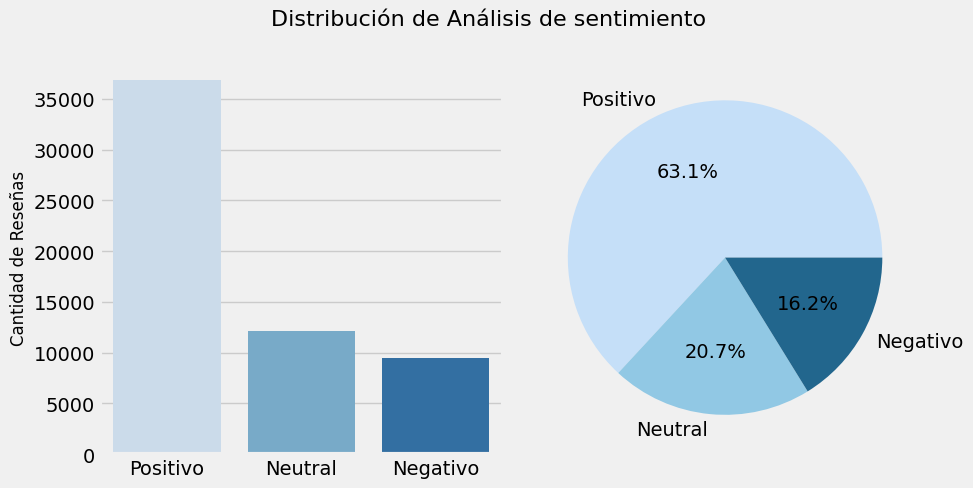

In [142]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  
sns.countplot(x= 'sentiment_analysis', data= reviews_, palette= 'Blues')
plt.xlabel('')
plt.ylabel('Cantidad de Reseñas',fontsize= 12)


plt.subplot(1, 2, 2)  
reviews_['sentiment_analysis'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#C5DFF8', '#91C8E4', '#22668D'])
plt.ylabel('')

plt.suptitle('Distribución de Análisis de sentimiento', fontsize=16)

plt.tight_layout() 
plt.show()

## Dataset 'Items'

Este Dataframe contiene informacion de los items de los usuarios, como por ejemplo:

* **item_id**: Identificador unico del item.
* **item_name**: Nombre del item.
* **user_id**: Identificador unico de usuario.
* **genres**: Género del item.
* **playtime_forever**: Tiempo de juego total.
* **playtime_2weeks**: Tiempo de juego hace 2 semanas.

### Información general

In [157]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10814961 entries, 0 to 10814960
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int64 
 1   item_name         object
 2   user_id           object
 3   genres            object
 4   playtime_forever  int64 
 5   playtime_2weeks   int64 
dtypes: int64(3), object(3)
memory usage: 495.1+ MB


### Registros nulos
Porcentaje de registros nulos en cada columna del dataset

In [158]:
u.porcentaje_nulos(items)

La columna item_id tiene un 0.0% de valores nulos.
La columna item_name tiene un 0.0% de valores nulos.
La columna user_id tiene un 0.0% de valores nulos.
La columna genres tiene un 8.7% de valores nulos.
La columna playtime_forever tiene un 0.0% de valores nulos.
La columna playtime_2weeks tiene un 0.0% de valores nulos.


### Estadística descriptiva
La estadística descriptiva ayuda a describir las características básicas del conjunto de datos y obtener un resumen de los datos, también conocido como resumen de 5 puntos.

* Mediana : El valor medio en las columnas, también llamado percentil 50. o 2do cuartil.
* 1er cuartil : El percentil 25.
* 3er cuartil : El percentil 75.
* Mínimo : La observación más pequeña en columnas.
* Máximo : La observación más grande en columnas.

In [159]:
items.describe()

,item_id,playtime_forever,playtime_2weeks
count,1.081496e+07,1.081496e+07,1.081496e+07
mean,2.086310e+05,9.543765e+02,9.969543e+00
std,1.241349e+05,5.113490e+03,1.536010e+02
min,1.000000e+01,0.000000e+00,0.000000e+00
25%,9.990000e+04,0.000000e+00,0.000000e+00
50%,2.277000e+05,4.600000e+01,0.000000e+00
75%,3.005500e+05,3.740000e+02,0.000000e+00
max,5.307200e+05,6.427730e+05,1.996700e+04


Veamos las estadísticas descriptivas de las columnas que no tienen registros numericos, en este caso muestra 4 puntos:
* count: Cantidad de registros.
* unique: Cantidad de registros únicos.
* top: El registro con mayor frecuencia en los registros.
* freq: Frecuencia del registros top.

In [160]:
items.describe(include= 'all')

,item_id,item_name,user_id,genres,playtime_forever,playtime_2weeks
count,1.081496e+07,10814961,10814961,9877304,1.081496e+07,1.081496e+07
unique,NaN,10947,70912,21,NaN,NaN
top,NaN,Unturned,phrostb,Action,NaN,NaN
freq,NaN,191390,17007,2776208,NaN,NaN
mean,2.086310e+05,NaN,NaN,NaN,9.543765e+02,9.969543e+00
std,1.241349e+05,NaN,NaN,NaN,5.113490e+03,1.536010e+02
min,1.000000e+01,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,9.990000e+04,NaN,NaN,NaN,0.000000e+00,0.000000e+00
50%,2.277000e+05,NaN,NaN,NaN,4.600000e+01,0.000000e+00
75%,3.005500e+05,NaN,NaN,NaN,3.740000e+02,0.000000e+00


### Cantidad de ítems unicos registrado

Veamos la cantidad de items únicos, basandonos en la columna items_id

In [161]:
u.registros_unicos(items,'item_id')

'La columna item_id tiene 10978 registros unicos'

### Distribuciones

#### Distribución de Géneros:

Primero calculamos la cantidad de registros por género y lo ordenamos

In [177]:
genre_counts = items['genres'].value_counts().reset_index()
genre_counts.columns = ['genres', 'count']

genre_counts = genre_counts.sort_values(by='count', ascending=False)


In [179]:
genre_counts.head()

,genres,count
0,Action,2776208
1,Indie,1743401
2,Adventure,1152700
3,RPG,900849
4,Strategy,794273


Graficamos

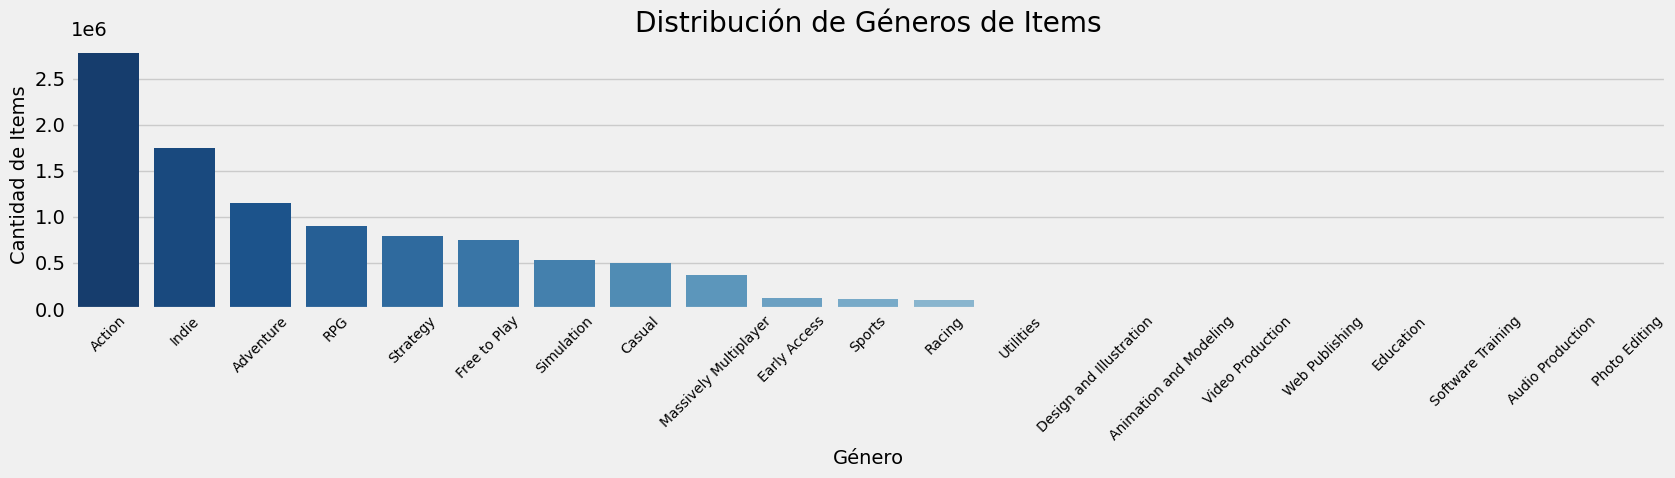

In [189]:
# Definimos la paleta de colores invertida
palette = sns.color_palette("Blues", len(genre_counts))
palette = palette[::-1]  


plt.figure(figsize=(17, 5))
ax = sns.countplot(x= 'genres', data= items, order= genre_counts['genres'], palette= palette)
plt.title('Distribución de Géneros de Items')
plt.xlabel('Género', fontsize= 14)
plt.ylabel('Cantidad de Items', fontsize= 14)


plt.xticks(rotation=45, fontsize=10)

plt.tight_layout()
plt.show()

### TOP 10

#### Top 10 de Usuarios con más Items:

Primero tenemos que extraer la cantidad de items por usuario y ordenarlo de manera descendiente, asi que iniciamos haciendo una copia del DataFrame.

In [293]:
items_ = items.copy()

Eliminamos los duplicados segun la columna *'item_id'* y *'user_id'*

In [294]:
items_.drop_duplicates(subset=['item_id','user_id'],inplace=True)

Ahora contamos la cantidad de registros por usuario y lo ordenamos

In [295]:
top_usuarios_items = items_['user_id'].value_counts().reset_index()
top_usuarios_items.columns = ['user_id', 'cantidad_items']
top_usuarios_items = top_usuarios_items.sort_values(by= 'cantidad_items', ascending=False)

Ahora solo agarramos los primeros 10

In [296]:
top_10_usuarios_items = top_usuarios_items.head(10)

In [298]:
top_10_usuarios_items

,user_id,cantidad_items
0,phrostb,7762
1,thugnificent,6700
2,chidvd,6410
3,piepai,6132
4,mayshowganmore,5027
5,DeEggMeister,4576
6,76561198070585472,4456
7,Steamified,4432
8,rawrvixen,4212
9,djnemonic,3876


Graficamos

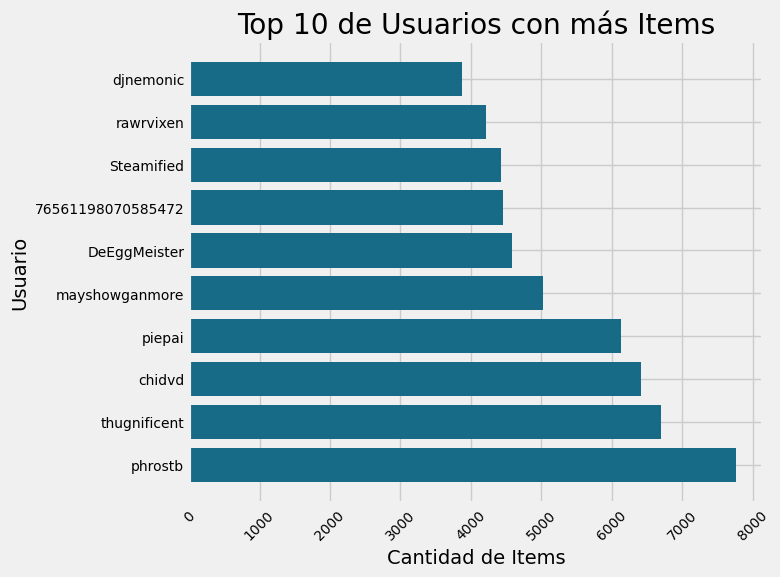

In [299]:
plt.figure(figsize=(8, 6))

plt.barh(top_10_usuarios_items['user_id'], top_10_usuarios_items['cantidad_items'], color= '#176B87')
plt.xlabel('Cantidad de Items', fontsize= 14)
plt.ylabel('Usuario', fontsize= 14)

plt.title('Top 10 de Usuarios con más Items')
plt.xticks(rotation= 45, fontsize= 10)
plt.yticks(fontsize= 10)

plt.tight_layout()
plt.show()

#### Top 10 de Items con más Usuarios:

Hacemos los mismos pasos, pero para obtener la cantidad de usuarios por Items

In [300]:
top_items_usuarios = items_['item_name'].value_counts().reset_index()
top_items_usuarios.columns = ['item_name', 'cantidad_usuarios']
top_items_usuarios = top_items_usuarios.sort_values(by='cantidad_usuarios', ascending=False)

Agarramos solo los primeros 10

In [301]:
top_10_items_usuarios = top_items_usuarios.head(10)

In [302]:
top_10_items_usuarios

,item_name,cantidad_usuarios
0,Dota 2 Test,49136
1,Counter-Strike: Global Offensive,43331
2,Garry's Mod,42849
3,Unturned,38278
4,Left 4 Dead 2 Beta,36661
5,Left 4 Dead 2,36661
6,Terraria,28934
7,Warframe,25516
8,Portal 2,24206
9,Counter-Strike: Source,23952


Graficamos

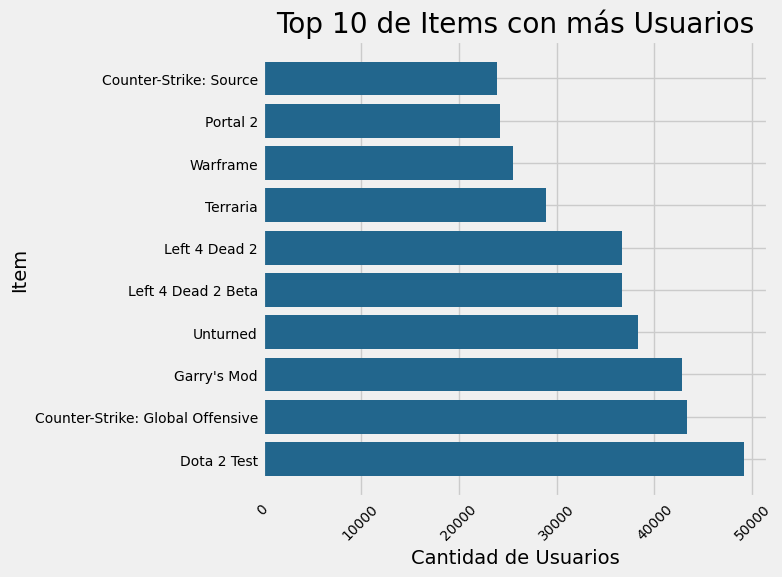

In [303]:
plt.figure(figsize=(8, 6))

plt.barh(top_10_items_usuarios['item_name'], top_10_items_usuarios['cantidad_usuarios'], color= '#22668D')
plt.xlabel('Cantidad de Usuarios', fontsize=14)
plt.ylabel('Item', fontsize= 14)

plt.title('Top 10 de Items con más Usuarios')
plt.xticks(rotation= 45, fontsize= 10)
plt.yticks(fontsize= 10)

plt.tight_layout()
plt.show()

### Nubes de Palabras

Graficamos nubes de palabras en base a la frecuencia de los items.

Primero contamos la cantidad de registros por item.

In [305]:
genres_counts = items_['item_name'].value_counts().reset_index()
genres_counts.columns = ['Item', 'Frequency']

Luego creamos un diccionario de Items y su frecuencia

In [306]:
genres_dict = dict(zip(genres_counts['Item'], genres_counts['Frequency']))

Creamos el objeto WordCloud con la frecuencia de los Items.

In [360]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues_r', max_words=50)
wordcloud.generate_from_frequencies(genres_dict)

Graficamos

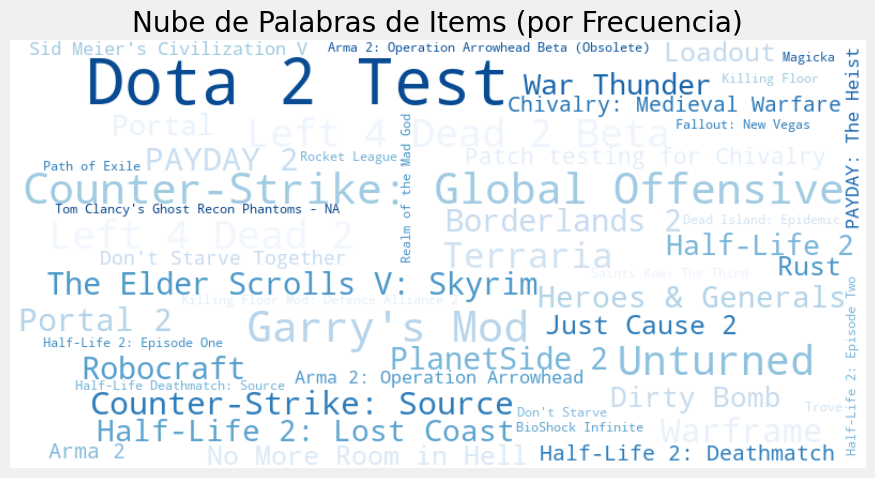

In [361]:
plt.figure(figsize=(10, 5))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Items (por Frecuencia)')
plt.tight_layout()
plt.show()

## Dataset 'Model Recommend'

Este Dataframe contiene informacion de los items de los usuarios, como por ejemplo:

* **user_id**: Identificador unico de usuario.
* **item_id**: Identificador unico del item.
* **app_name**: Nombre del item.
* **rating**: Número del rating calculado en base a la recomendacion y el análisis de sentimiento.

### Información general

In [7]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58431 entries, 0 to 58430
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   58431 non-null  object
 1   item_id   58431 non-null  int64 
 2   app_name  53197 non-null  object
 3   rating    58431 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.8+ MB


### Registros nulos
Porcentaje de registros nulos en cada columna del dataset.

In [8]:
u.porcentaje_nulos(model)

La columna user_id tiene un 0.0% de valores nulos.
La columna item_id tiene un 0.0% de valores nulos.
La columna app_name tiene un 9.0% de valores nulos.
La columna rating tiene un 0.0% de valores nulos.


### Estadística descriptiva
La estadística descriptiva ayuda a describir las características básicas del conjunto de datos y obtener un resumen de los datos, también conocido como resumen de 5 puntos.

* Mediana : El valor medio en las columnas, también llamado percentil 50. o 2do cuartil.
* 1er cuartil : El percentil 25.
* 3er cuartil : El percentil 75.
* Mínimo : La observación más pequeña en columnas.
* Máximo : La observación más grande en columnas.

In [9]:
model.describe()

,item_id,rating
count,58431.000000,58431.000000
mean,169703.670586,3.872260
std,132019.789420,1.521181
min,10.000000,1.000000
25%,8930.000000,3.000000
50%,218230.000000,5.000000
75%,261640.000000,5.000000
max,527340.000000,5.000000


Veamos las estadísticas descriptivas de las columnas que no tienen registros numericos, en este caso muestra 4 puntos:
* count: Cantidad de registros.
* unique: Cantidad de registros únicos.
* top: El registro con mayor frecuencia en los registros.
* freq: Frecuencia del registros top.

In [10]:
model.describe(include='all')

,user_id,item_id,app_name,rating
count,58431,58431.000000,53197,58431.000000
unique,25458,NaN,3195,NaN
top,76561198108415635,NaN,Counter-Strike: Global Offensive,NaN
freq,10,NaN,3708,NaN
mean,NaN,169703.670586,NaN,3.872260
std,NaN,132019.789420,NaN,1.521181
min,NaN,10.000000,NaN,1.000000
25%,NaN,8930.000000,NaN,3.000000
50%,NaN,218230.000000,NaN,5.000000
75%,NaN,261640.000000,NaN,5.000000


### Cantidad de ítems unicos registrado

Veamos la cantidad de items únicos que hay registrado, basandonos en la columna item_id

In [11]:
u.registros_unicos(model,'item_id')

'La columna item_id tiene 3682 registros unicos'

### Distribuciones

Distribucion de los puntos del Rating

Text(0.5, 1.0, 'Distribución del Rating')

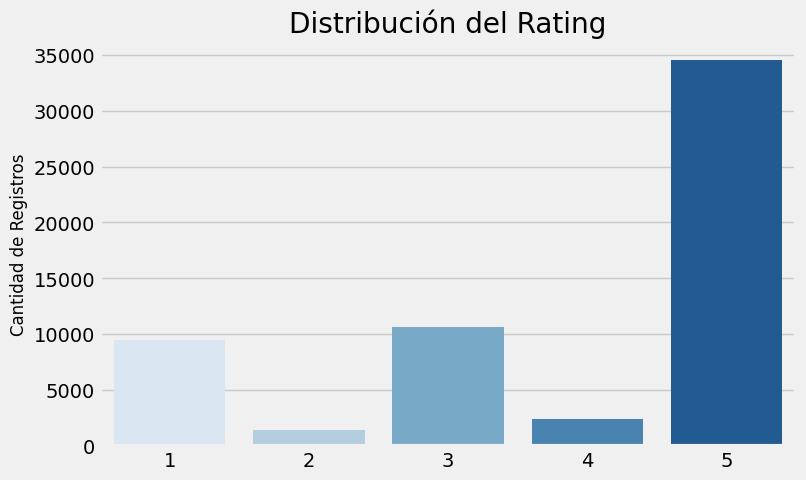

In [13]:
plt.figure(figsize=(8, 5))

sns.countplot(x= 'rating', data= model, palette= 'Blues')
plt.xlabel('')
plt.ylabel('Cantidad de Registros',fontsize= 12)
plt.title('Distribución del Rating')

TOP 10 juegos más evaluados

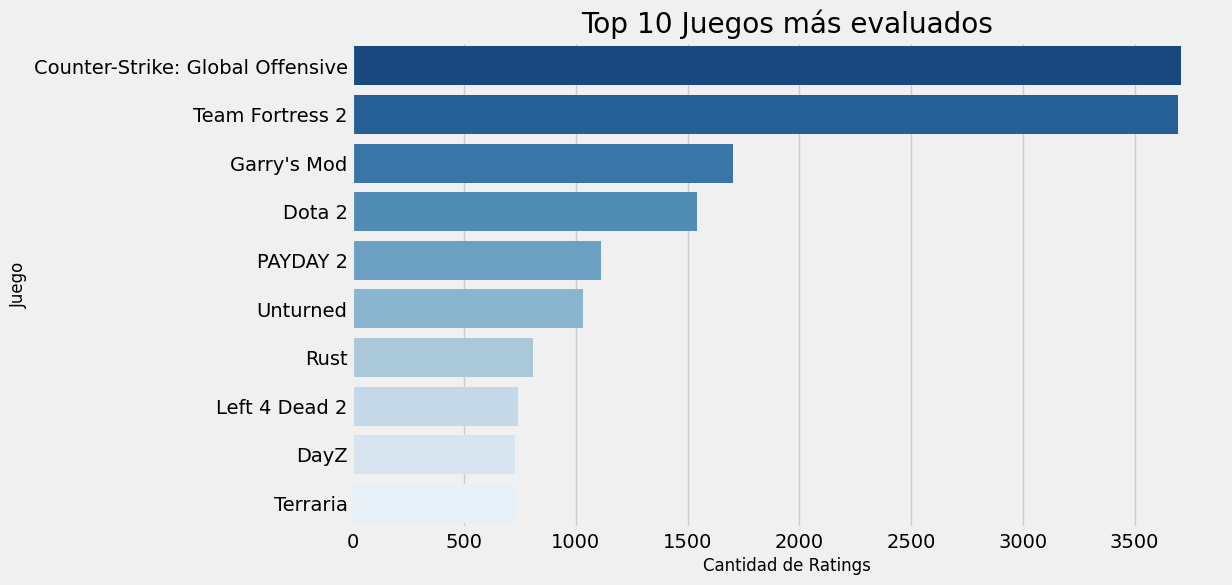

In [4]:
top_apps = model['app_name'].value_counts().head(10)
palette = sns.color_palette("Blues", len(top_apps))
palette = palette[::-1]  

plt.figure(figsize=(10, 6))
sns.barplot(x=top_apps.values, y=top_apps.index, palette=palette)
plt.title('Top 10 Juegos más evaluados')
plt.xlabel('Cantidad de Ratings',fontsize= 12)
plt.ylabel('Juego',fontsize= 12)
plt.show()
